In [1]:
!pip -q install ./python

Invalid requirement: './python'
It looks like a path. Does it exist ?


In [2]:
from unityagents import UnityEnvironment
#from dqn_agent import Agent
from dqn_window_agent import Agent
from train import train_rl

import numpy as np

from collections import deque
import matplotlib.pyplot as plt

saved_scores=[]

TRAINING_PARAMS = {
    "REPLAY_BUFFER_SIZE": int(1e5),
    "BATCH_SIZE": 64,
    "GAMMA": 0.95,
    "TAU": 5e-2,
    "LEARNING_RATE": 5e-3,
    "UPDATE_TARGET_NET_STEPS": 4,
    "SEED": int(1234),
}

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


agent instantiated
train
Episode 569	Average Score: 13.46	Max Score: 21.00	eps: 0.09
Environment solved in 469 episodes!	Average Score: 13.46


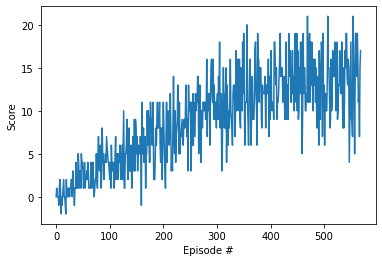

In [3]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

dqn_agent=Agent(state_size, action_size, TRAINING_PARAMS)

print("agent instantiated")

scores = train_rl(agent=dqn_agent, env=env, training_params=TRAINING_PARAMS)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()